In [3]:
# we create a synthetic dataset with different parameters

In [7]:
import numpy as np
import pandas as pd
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Number of customers
n_customers = 1000

# Generate synthetic data
customer_ids = [f"CUST_{i}" for i in range(1, n_customers + 1)]
ages = np.random.randint(18, 70, n_customers)
genders = np.random.choice(['Male', 'Female'], n_customers, p=[0.5, 0.5])
annual_incomes = np.random.randint(20000, 120000, n_customers)
spending_scores = np.random.randint(1, 100, n_customers)
engagement_scores = np.random.randint(1, 100, n_customers)
purchase_frequencies = np.random.randint(1, 15, n_customers)
product_categories = np.random.choice([
    'Electronics', 'Clothing', 'Groceries', 'Health & Beauty', 'Sports & Outdoors'
], n_customers)
regions = np.random.choice(['North', 'South', 'East', 'West'], n_customers)

# Create a DataFrame, this would also be the paraeters
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'AnnualIncome': annual_incomes,
    'SpendingScore': spending_scores,
    'EngagementScore': engagement_scores,
    'PurchaseFrequency': purchase_frequencies,
    'ProductCategoryPreference': product_categories,
    'Region': regions
})

# Save to CSV
data.to_csv('synthetic_marketing_data.csv', index=False)



In [8]:
print(data.head())

  CustomerID  Age  Gender  AnnualIncome  SpendingScore  EngagementScore  PurchaseFrequency ProductCategoryPreference Region
0     CUST_1   56  Female         75922             55               36                  7         Sports & Outdoors  North
1     CUST_2   69    Male         68231             71               41                  1         Sports & Outdoors  South
2     CUST_3   46    Male         49301             92               69                  1                 Groceries  South
3     CUST_4   32    Male        111652             28               13                  7           Health & Beauty   West
4     CUST_5   60    Male         82711              4               87                 10                 Groceries   West


In [9]:
# we now proceed with the eda

In [10]:
print(data.isnull().sum())

CustomerID                   0
Age                          0
Gender                       0
AnnualIncome                 0
SpendingScore                0
EngagementScore              0
PurchaseFrequency            0
ProductCategoryPreference    0
Region                       0
dtype: int64


In [11]:
# so we do not have any missing data

In [12]:
print(data.describe())

              Age   AnnualIncome  SpendingScore  EngagementScore  PurchaseFrequency
count  1000.00000    1000.000000    1000.000000      1000.000000        1000.000000
mean     43.81900   69490.737000      49.762000        50.214000           7.596000
std      14.99103   29009.030034      28.110951        27.751908           4.011094
min      18.00000   20155.000000       1.000000         1.000000           1.000000
25%      31.00000   43856.500000      26.000000        27.000000           4.000000
50%      44.00000   69811.500000      49.000000        50.500000           8.000000
75%      56.00000   94531.750000      74.000000        74.000000          11.000000
max      69.00000  119942.000000      99.000000        99.000000          14.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# in the below we apply the eda only for the age coulmn but it can be applied to rest of the columns for 

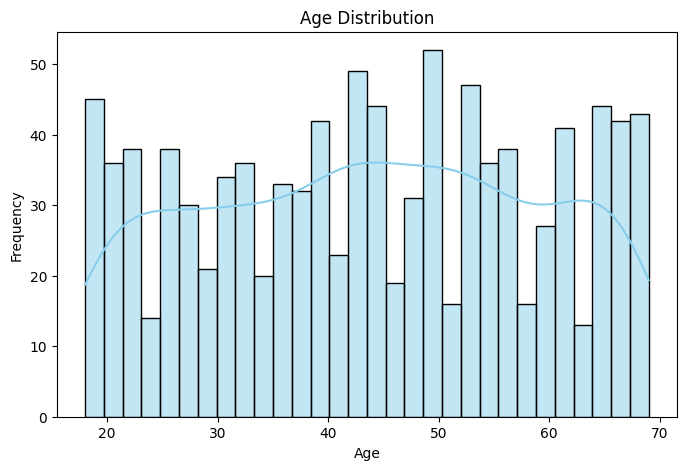

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
# now we will proceed with the encoding , to convert all the strings to numerical values for the model to process
# we will make use of label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder= {}

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoder[col] = le
print(data.head())

   CustomerID  Age  Gender  AnnualIncome  SpendingScore  EngagementScore  PurchaseFrequency  ProductCategoryPreference  Region
0           0   56       0         75922             55               36                  7                          4       1
1         112   69       1         68231             71               41                  1                          4       2
2         223   46       1         49301             92               69                  1                          2       2
3         334   32       1        111652             28               13                  7                          3       3
4         445   60       1         82711              4               87                 10                          2       3


In [17]:
# so now we have encoded all the cols which were in the form of objects to numerical values which can be fed to the model

In [18]:
# we are going to standardize the data to ensure that all the parameters contribute equally to the model

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
type(data)
print(data.head)

<bound method NDFrame.head of      CustomerID  Age  Gender  AnnualIncome  SpendingScore  EngagementScore  PurchaseFrequency  ProductCategoryPreference  Region
0             0   56       0         75922             55               36                  7                          4       1
1           112   69       1         68231             71               41                  1                          4       2
2           223   46       1         49301             92               69                  1                          2       2
3           334   32       1        111652             28               13                  7                          3       3
4           445   60       1         82711              4               87                 10                          2       3
..          ...  ...     ...           ...            ...              ...                ...                        ...     ...
995         996   60       1        109906             47          

In [25]:
sc_data = sc.fit_transform(data)

In [26]:
# now we will proceed with the clustering of the data by the K-means clustering and use the elbow joint method in that

In [27]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(sc_data)

# If sc_data was originally a DataFrame before scaling
data_with_clusters = data.copy()  # Original data remains unchanged
data_with_clusters['Cluster'] = cluster_labels

print(data_with_clusters.head())

   CustomerID  Age  Gender  AnnualIncome  ...  PurchaseFrequency  ProductCategoryPreference  Region  Cluster
0           0   56       0         75922  ...                  7                          4       1        0
1         112   69       1         68231  ...                  1                          4       2        1
2         223   46       1         49301  ...                  1                          2       2        1
3         334   32       1        111652  ...                  7                          3       3        1
4         445   60       1         82711  ...                 10                          2       3        2

[5 rows x 10 columns]


In [31]:
# now we will proceed with plotting by the elbow method

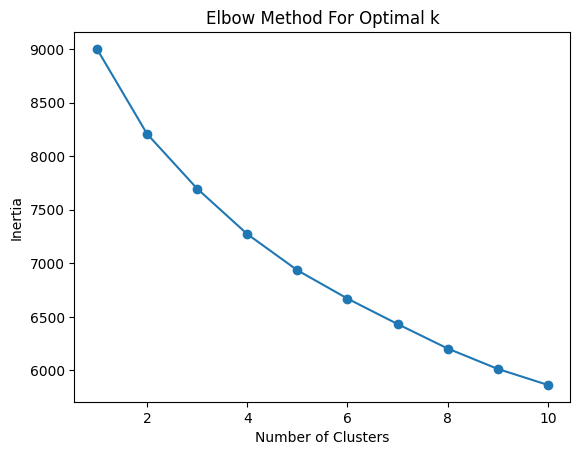

In [32]:
inertia = []
for k in range(1, 11):  # Adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sc_data)  # Use the scaled data (sc_data)
    inertia.append(kmeans.inertia_)  # Store inertia (sum of squared distances)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
# inertia tells us how well the datapoints fit into their clusters => small inertia means that clusters will be compact

In [35]:
# now we have obtained the clusters, this is basically based on the parameters like age, purchase beahviour etc, so essentially what the k means is trying to do is to reduce the distance between the centoids and the datpoints of the respective clusters


In [36]:
# now we will proceed with the interpretaion of the clusters

In [37]:
print('cluster centers (centroids')
print(kmeans.cluster_centers_)

cluster centers (centroids
[[ 0.18570311  0.41055661 -0.40776797  0.46289874  0.7750756  -0.75136743
   0.23037856  1.01629984 -0.75739711]
 [ 0.18731629 -0.50024724 -0.46659197 -0.09015451  0.36019474  0.78488976
  -1.00333814 -0.83326268 -0.8592597 ]
 [-0.284516    0.36416715 -0.24089989  0.75396465 -0.5079638   0.99179688
   0.45964959  0.59371297 -0.78631994]
 [-0.14552383  0.79233047 -0.70509655 -0.51287716 -0.922399   -0.5792966
   0.07582773 -0.52605578 -0.31161741]
 [-0.9421228   0.41064834  0.63017327  0.68570579  0.50940745  0.01856556
   0.24996481 -0.66735961  0.4789441 ]
 [-0.54465686 -0.1632538   1.00400803 -0.81330529 -0.33326443  0.31247196
  -0.53972295  0.55691442  0.21919269]
 [-0.40809568 -0.79348282 -0.99600797 -0.32469383 -0.27282408 -0.22212712
  -0.20555055  0.58190516  0.75958634]
 [ 0.6410441  -0.1155683   0.92633751 -0.90878028  0.25553529 -0.04656675
   0.69650498 -0.57018709 -0.07071681]
 [ 0.70560837 -0.72773937  0.91890097  0.60258952 -0.13162204 -0.47715

In [43]:
# calc the avg value for each clusterv to better understand each of the clusters

In [39]:
cluster_summary = data_with_clusters.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID        Age    Gender  AnnualIncome  ...  EngagementScore  PurchaseFrequency  ProductCategoryPreference    Region
Cluster                                                 ...                                                                         
0        490.913043  50.491639  0.444816  65418.438127  ...        23.528428           9.789298                   2.053512  1.371237
1        502.825397  35.000000  0.650794  63665.804233  ...        50.605820           4.272487                   1.814815  1.687831
2        503.557276  47.962848  0.368421  80077.244582  ...        74.458204           9.455108                   2.071207  1.566563

[3 rows x 9 columns]


In [42]:
# we can now visualize the cluster using pca

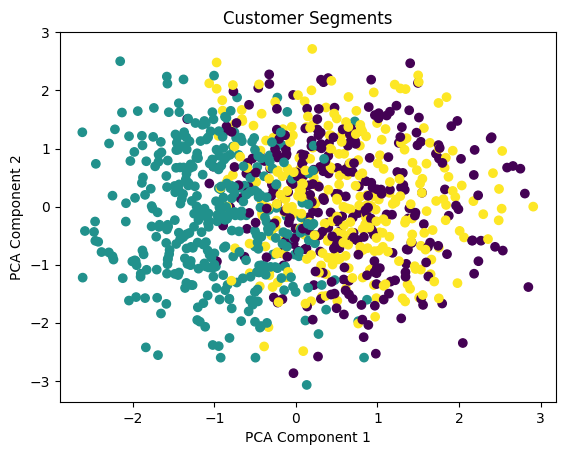

In [41]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(sc_data)

# Plot the clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [45]:
# now we will create a marketing strategy for each of the cluster obeserved using DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

In [46]:
from sklearn.cluster import DBSCAN


In [116]:
dbscan = DBSCAN(eps = 1.25, min_samples = 4) # eps means the epsilon: distance between the tow points considered as neighbors 
cluster_dbscan = dbscan.fit_predict(sc_data) # fitting the model on the data
dbscan_data = data.copy() # we created a copy of the original dataset
dbscan_data['clusters'] = cluster_dbscan # creates a new col called the clusters to store the result of cluster_dbscan
print(dbscan_data.head())


   CustomerID  Age  Gender  AnnualIncome  ...  PurchaseFrequency  ProductCategoryPreference  Region  clusters
0           0   56       0         75922  ...                  7                          4       1        -1
1         112   69       1         68231  ...                  1                          4       2        -1
2         223   46       1         49301  ...                  1                          2       2        -1
3         334   32       1        111652  ...                  7                          3       3        -1
4         445   60       1         82711  ...                 10                          2       3        -1

[5 rows x 10 columns]


In [117]:
# we see that its indicating -1 meaning it does not belong to any cluster => noise points

In [118]:
# we want to get those datapoints excluding the noise

In [119]:
unique_labels = np.unique(cluster_dbscan)
print(f'unique clusters {unique_labels}')


unique clusters [-1  0  1]


In [120]:
# Get the count of data points in each cluster
cluster_sizes = dbscan_data['clusters'].value_counts()
print(cluster_sizes)

clusters
-1    991
 0      5
 1      4
Name: count, dtype: int64


In [121]:
cluster_sizes = dbscan_data['clusters'].value_counts()
print(cluster_sizes)


clusters
-1    991
 0      5
 1      4
Name: count, dtype: int64


In [122]:
# so we have obtained the distribution of the datapoints in the clusters

In [124]:
# Analyze the features for each cluster (including noise points)
cluster_summary = dbscan_data.groupby('clusters').mean()
print(cluster_summary)

          CustomerID        Age    Gender  AnnualIncome  ...  EngagementScore  PurchaseFrequency  ProductCategoryPreference   Region
clusters                                                 ...                                                                        
-1        498.797175  43.889001  0.498486  69639.170535  ...        50.523713           7.563068                   1.961655  1.54894
 0        472.000000  43.800000  0.000000  63265.200000  ...        10.600000          11.200000                   4.000000  3.00000
 1        708.000000  26.500000  1.000000  40498.250000  ...        23.000000          11.250000                   1.250000  1.00000

[3 rows x 9 columns]


In [125]:
# now we will create a marketing strategy for each of the clusters

In [131]:
for cluster, group in dbscan_data.groupby('clusters'):
    if cluster == -1:  # Check for the noise cluster
        print(f"Cluster {cluster} - Noise: Target with re-engagement offers or analyze for data errors")
    else:
        print(f"Cluster {cluster} - Profile:")
        print(group.mean())  # Display the average features for the cluster
        
        if cluster == 0:  # High purchase and high engagement
            print("Strategy: VIP loyalty programs, early accessto products, exclusive promotions.")
        elif cluster == 1:  # Moderate purchase, low engagement
            print("Strategy: Email campaigns, discount offers, personalized marketing.")
        

Cluster -1 - Noise: Target with re-engagement offers or analyze for data errors
Cluster 0 - Profile:
CustomerID                     472.0
Age                             43.8
Gender                           0.0
AnnualIncome                 63265.2
SpendingScore                   20.4
EngagementScore                 10.6
PurchaseFrequency               11.2
ProductCategoryPreference        4.0
Region                           3.0
clusters                         0.0
dtype: float64
Strategy: VIP loyalty programs, early accessto products, exclusive promotions.
Cluster 1 - Profile:
CustomerID                     708.00
Age                             26.50
Gender                           1.00
AnnualIncome                 40498.25
SpendingScore                   93.25
EngagementScore                 23.00
PurchaseFrequency               11.25
ProductCategoryPreference        1.25
Region                           1.00
clusters                         1.00
dtype: float64
Strategy: Email cam

In [132]:
# that concludes the project--------